In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing

In [4855]:
a=np.genfromtxt('D:\Program Files\data.csv',  delimiter=',')
print(pd.DataFrame(a))
X=a[:,0:5]
Y=a[:,5]
print(X.dtype)
X_norm=preprocessing.scale(X)
print(pd.DataFrame(X_norm))
X=X_norm

         0     1      2     3      4    5
0    14.50  7.42  12.60  1.80   94.0  2.0
1    14.80  7.68  11.80  2.00   70.0  2.0
2    15.20  7.70  11.00  2.40  110.0  2.0
3    15.00  8.03  11.50  1.80  110.0  2.0
4    16.50  8.08  11.20  2.00  120.0  2.0
5    16.80  8.19  10.70  2.90  140.0  2.0
6    17.10  8.81  11.00  3.60  160.0  4.0
7    16.50  8.70  12.10  3.00  120.0  2.0
8    16.40  8.64  11.90  2.60  120.0  2.0
9    15.40  8.30  11.20  1.80  110.0  2.0
10   15.80  7.96  11.00  1.60   90.0  2.0
11   14.90  7.61  12.00  1.20  110.0  2.0
12   14.60  7.19  13.00  1.60   70.0  2.0
13   15.10  7.27  12.80  1.60  110.0  2.0
14   16.90  7.38  12.60  1.90  140.0  2.0
15   21.60  8.08  10.30  2.40  140.0  2.0
16   22.80  8.13   7.80  3.60  220.0  4.0
17   24.10  8.30   8.04  3.80  280.0  4.0
18   25.00  8.63   7.70  4.90  140.0  4.0
19   22.10  8.76  10.90  4.10  120.0  4.0
20   21.60  8.15  10.60  3.20  150.0  4.0
21   20.50  8.06  11.00  3.00  220.0  2.0
22   19.80  7.81  11.40  2.70  110

In [4856]:
#divide data into train,validate and test as 60%,20%,20%
Y=np.reshape(Y,(-1,1))
m,n=X.shape
m1,n1=Y.shape
train_start = 0
train_end = int(.1*m)
test_start = int(.1*m)
test_end = m

X_train = X[train_start:train_end,:]
Y_train = Y[train_start:train_end,:]

X_test = X[test_start:test_end,:]
Y_test = Y[test_start:test_end,:]

print X.shape,Y.shape
print X_train.shape,Y_train.shape
print X_test.shape,Y_test.shape
print(X.dtype)
y = Y_train
print(y.shape)

(900, 5) (900, 1)
(90, 5) (90, 1)
(810, 5) (810, 1)
float64
(90, 1)


D:\Program Files\Anaconda Python\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Program Files\Anaconda Python\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Program Files\Anaconda Python\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

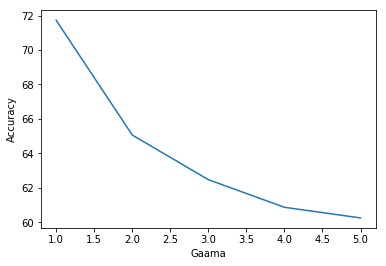

In [4857]:
X1 = X_train# we only take the first two features.
y = Y_train
y=y.ravel()
#print(y.shape)
# we create an instance of SVM and fit out data.
#C = 2.0 # SVM regularization parameter
cc=[]
acc=[]
for i in range(1,6):
    svc = svm.SVC(kernel='rbf', C=1,gamma=i, verbose=False,degree=4).fit(X1, y)
    coun=0
    cc.append(i)
    for i in range(X_test.shape[0]):
        if(svc.predict(X_test[i])==Y_test[i]):
            #print("hi")
            coun=coun+1
    #print((1.0*coun*100)/Y_test.shape[0])
    acc.append((1.0*coun*100)/Y_test.shape[0])

plt.plot(cc,acc)
plt.xlabel('Gaama')
plt.ylabel('Accuracy')
plt.show()

D:\Program Files\Anaconda Python\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Program Files\Anaconda Python\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Program Files\Anaconda Python\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

66.049382716


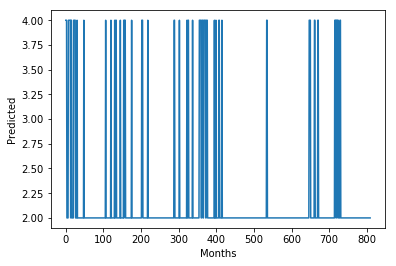

In [4858]:
X1 = X_train# we only take the first two features.
y = Y_train
y=y.ravel()
#print(y.shape)
# we create an instance of SVM and fit out data.
#C = 2.0 # SVM regularization parameter
observed=[]
svc = svm.SVC(kernel='rbf', C=1000,gamma=2.0, verbose=False).fit(X1, y)
coun=0
for i in range(X_test.shape[0]):
    tt=svc.predict(X_test[i])
    observed.append(int(tt))
    if(tt==Y_test[i]):
        #observed.append(svc.predict(X_test[i]))
        #print("hi")
        coun=coun+1
months=[]
for i in range(Y_test.shape[0]):
    months.append(i)
print((1.0*coun*100)/Y_test.shape[0])
plt.plot(months,observed)
plt.xlabel('Months')
plt.ylabel('Predicted')
plt.show()

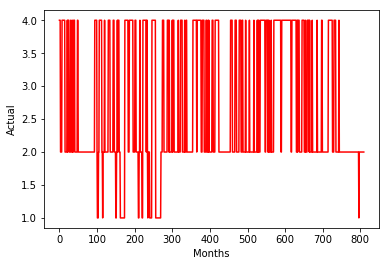

In [4859]:
plt.plot(months,Y_test,color='red')
plt.xlabel('Months')
plt.ylabel('Actual')
plt.show()

In [4860]:
import xlwt
from tempfile import TemporaryFile
book = xlwt.Workbook()
sheet1 = book.add_sheet('sheet1')


for i,e in enumerate(observed):
    sheet1.write(i,1,e)

name = "predicted.xls"
book.save(name)
book.save(TemporaryFile())

## 